Библиотеки

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib as mpl

Функции

In [63]:
def rename_columns(name):
    new_name = name.replace(' ', '_').lower()
    return new_name

Загрузка файла

In [64]:
file_id = '1ATASmLwbd-sVPOJ7kChU9fumc15lRvwK'
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
df = pd.read_csv(download_url)

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [65]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


#### Общей информации о данных

In [66]:
df.shape

(2240, 22)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [68]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


####  Классификация признаков по типам данных

In [69]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [70]:
data_types = df.dtypes

type_counts = data_types.value_counts()

type_info = pd.DataFrame({
    'Type': data_types,
    'Count': [1] * len(data_types)
}).groupby('Type').count()

type_info['Features'] = data_types.groupby(data_types).apply(lambda x: list(x.index))
type_info = type_info.reset_index()

print(type_info)

      Type  Count                                           Features
0    int64     18  [Id, Year_Birth, Kidhome, Teenhome, Recency, M...
1  float64      1                                           [Income]
2   object      3           [Education, Marital_Status, Dt_Customer]


#### Общая информация о данных

датасет: Superstore Marketing Campaign Dataset

Датасет содержит 2240 записей и 22 столбца.

Данные включают числовые и категориальные переменные.

Основные переменные:

Id – идентификатор клиента.
Year_Birth – год рождения.
Education – уровень образования.
Marital_Status – семейное положение.
Income – доход.
Kidhome, Teenhome – количество детей разного возраста.
Dt_Customer – дата регистрации.
Recency – число дней с момента последней покупки.
MntWines, MntFruits, MntMeatProducts, ... – сумма покупок в разных категориях товаров.
NumDealsPurchases, NumWebPurchases, ... – количество покупок по различным каналам.
Response – целевая переменная (отклик на маркетинговую кампанию).
Complain – наличие жалоб от клиента.
3 категориальных признака (object): Education, Marital_Status, Dt_Customer.

1 признак с числовым непрерывным (вещественным) типом (float64): Income.

Остальные 18 признаков - дискретные, целые числа (int64) .

Данные содержат идентификатор (Id), информацию о пользователях (Year_Birth, Education, Marital_Status, Income и др.), информацию о покупательской активности (MntWines, NumWebPurchases и др.).

#### Осуществим преобразование столбца Dt_Customer в дату 
#### Осуществим преобразование столбцов Education Marital_Status в дамми переменные

In [71]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [72]:
# df = pd.get_dummies(df, columns=["Education", "Marital_Status"])

In [109]:
df['Total_Spending'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)
df['Total_Spending_Bins'] = pd.cut(
    df['Total_Spending'], 
    bins=[0, 500, 1000, 2000, 3000],
    labels=['0-500', '501-1000', '1001-2000', '>2000']
)

In [73]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,149,165,63,1,5,4,10,3,0,0


#### Проверка наличия пропущенных значений

In [74]:
print("\nОбщее количество пропусков в датасете:", df.isnull().sum().sum())

# Подсчет пропусков в каждом столбце
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  #только столбцы с пропусками
print("\nКоличество пропусков в столбцах:")
print(missing_values)

# Процент пропусков
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]  #только столбцы с пропусками
print("\nПроцент пропусков в столбцах:")
print(missing_percent)


Общее количество пропусков в датасете: 24

Количество пропусков в столбцах:
Income    24
dtype: int64

Процент пропусков в столбцах:
Income    1.071429
dtype: float64


In [75]:
# Проверка строк с пропусками
rows_with_nan = df[df.isnull().any(axis=1)]

print("\nСтроки с пропусками:")
for index, row in rows_with_nan.iterrows():
    nan_columns = row.index[row.isnull()].tolist()  # Список колонок с NaN
    print(f"Индекс {index}: пропуски в колонках {', '.join(nan_columns)}")


Строки с пропусками:
Индекс 134: пропуски в колонках Income
Индекс 262: пропуски в колонках Income
Индекс 394: пропуски в колонках Income
Индекс 449: пропуски в колонках Income
Индекс 525: пропуски в колонках Income
Индекс 590: пропуски в колонках Income
Индекс 899: пропуски в колонках Income
Индекс 997: пропуски в колонках Income
Индекс 1096: пропуски в колонках Income
Индекс 1185: пропуски в колонках Income
Индекс 1213: пропуски в колонках Income
Индекс 1312: пропуски в колонках Income
Индекс 1515: пропуски в колонках Income
Индекс 1558: пропуски в колонках Income
Индекс 1693: пропуски в колонках Income
Индекс 1804: пропуски в колонках Income
Индекс 1858: пропуски в колонках Income
Индекс 1863: пропуски в колонках Income
Индекс 1880: пропуски в колонках Income
Индекс 1967: пропуски в колонках Income
Индекс 1983: пропуски в колонках Income
Индекс 2139: пропуски в колонках Income
Индекс 2165: пропуски в колонках Income
Индекс 2170: пропуски в колонках Income


#### Проверка наличия повторяющихся строк

In [76]:
df.duplicated().sum()

0

#### Проверка наличия выбросов

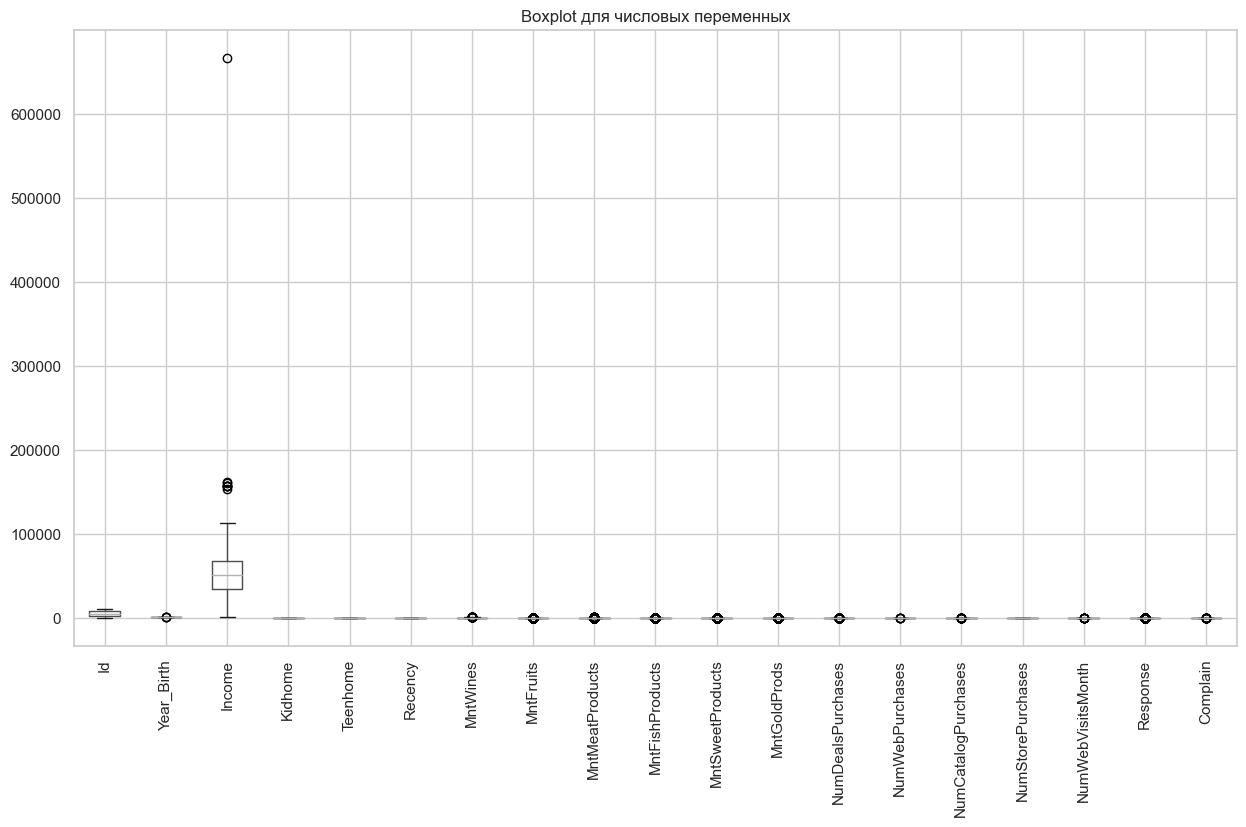

Id                       0
Year_Birth               3
Income                   8
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                35
MntFruits              227
MntMeatProducts        175
MntFishProducts        223
MntSweetProducts       248
MntGoldProds           207
NumDealsPurchases       86
NumWebPurchases          4
NumCatalogPurchases     23
NumStorePurchases        0
NumWebVisitsMonth        8
Response               334
Complain                21
dtype: int64

In [77]:
# Анализ выбросов для числовых переменных
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Использование метода IQR для выявления выбросов
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

# Визуализация выбросов через boxplot
plt.figure(figsize=(15, 8))
df[numeric_columns].boxplot(rot=90)
plt.title("Boxplot для числовых переменных")
plt.show()

outliers_iqr

#### Анализ выбросов с использованием Z-score (значения >3 или <-3 считаются выбросами)

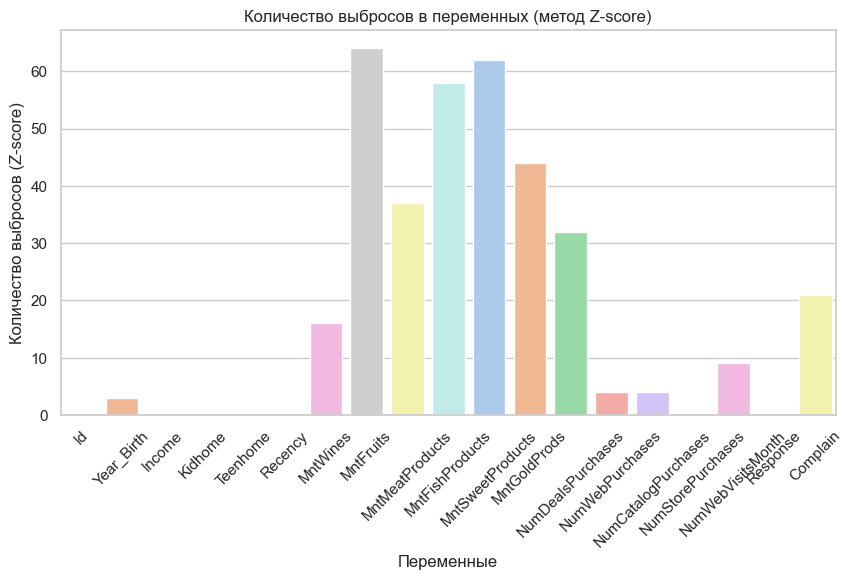

In [78]:
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
z_outliers = (z_scores > 3) | (z_scores < -3)
z_outlier_counts = z_outliers.sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=z_outlier_counts.index, y=z_outlier_counts.values, palette="pastel")
plt.xticks(rotation=45)
plt.xlabel("Переменные")
plt.ylabel("Количество выбросов (Z-score)")
plt.title("Количество выбросов в переменных (метод Z-score)")
plt.show()
     

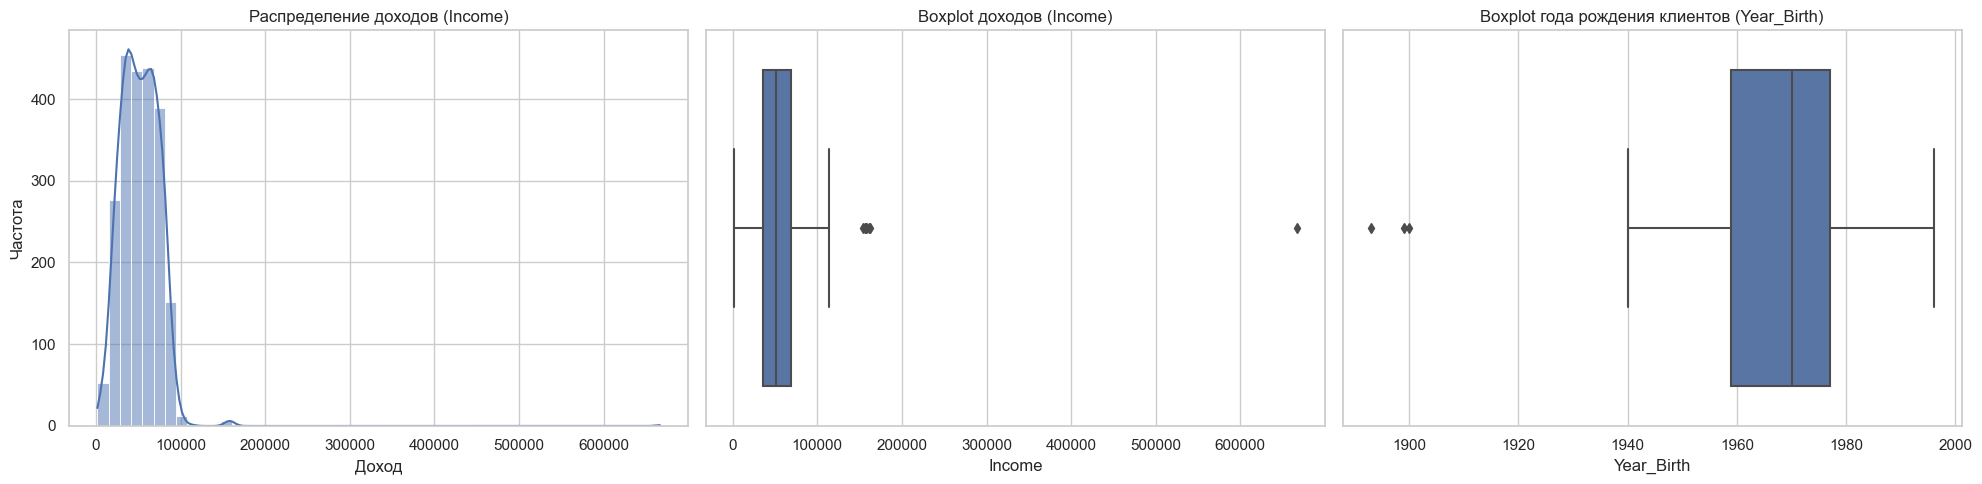

In [79]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Гистограмма доходов
sns.histplot(df["Income"].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Распределение доходов (Income)")
axes[0].set_xlabel("Доход")
axes[0].set_ylabel("Частота")

# Boxplot доходов
sns.boxplot(x=df["Income"].dropna(), ax=axes[1])
axes[1].set_title("Boxplot доходов (Income)")

# Boxplot года рождения клиентов
sns.boxplot(x=df["Year_Birth"], ax=axes[2])
axes[2].set_title("Boxplot года рождения клиентов (Year_Birth)")

plt.tight_layout()
plt.show()

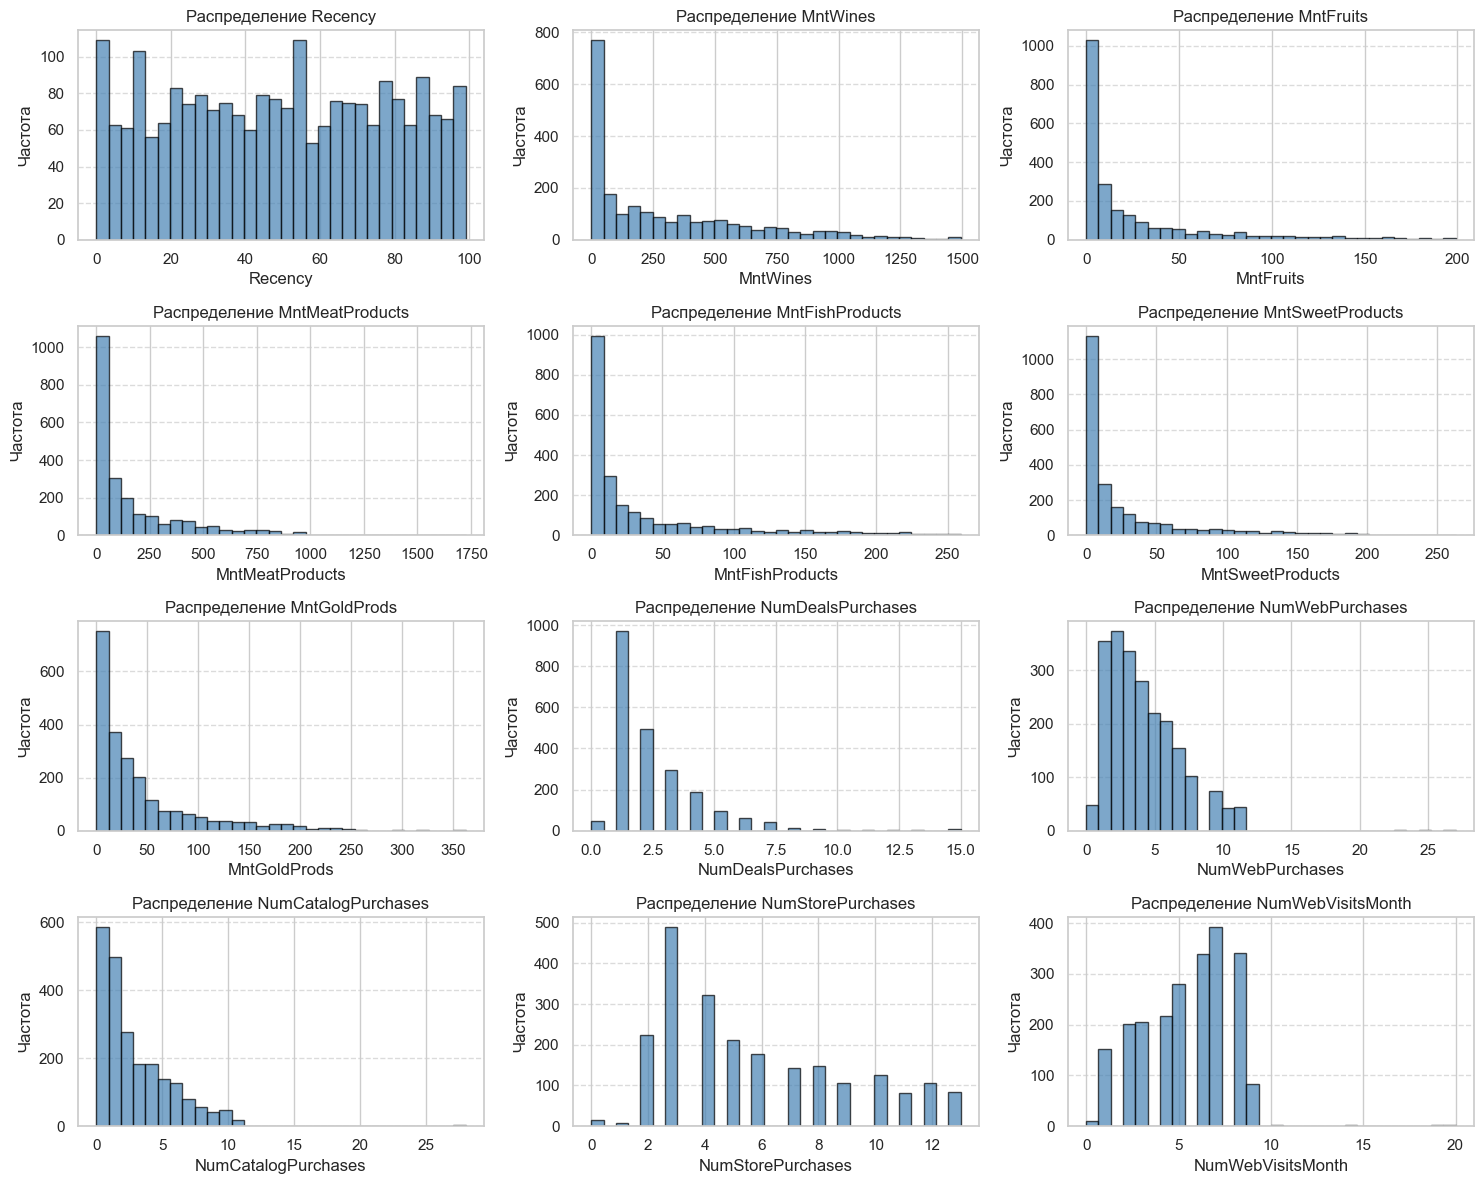

In [91]:
columns = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [81]:
# Вычисление границ ящика для доходов и года рождения (IQR-метод)
Q1_income = df["Income"].dropna().quantile(0.25)
Q3_income = df["Income"].dropna().quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

Q1_year_birth = df["Year_Birth"].quantile(0.25)
Q3_year_birth = df["Year_Birth"].quantile(0.75)
IQR_year_birth = Q3_year_birth - Q1_year_birth
lower_bound_year_birth = Q1_year_birth - 1.5 * IQR_year_birth
upper_bound_year_birth = Q3_year_birth + 1.5 * IQR_year_birth

print("### Статистика по доходам (Income) ###")
print(f"Min: {df['Income'].min():.1f}")
print(f"Q1 (25%): {Q1_income:.1f}")
print(f"Median (50%): {df['Income'].median():.1f}")
print(f"Q3 (75%): {Q3_income:.1f}")
print(f"Max: {df['Income'].max():.1f}")
print(f"Lower Bound (1.5*IQR): {lower_bound_income:.1f}")
print(f"Upper Bound (1.5*IQR): {upper_bound_income:.1f}\n")

print("### Статистика по году рождения (Year_Birth) ###")
print(f"Min: {df['Year_Birth'].min():.0f}")
print(f"Q1 (25%): {Q1_year_birth:.0f}")
print(f"Median (50%): {df['Year_Birth'].median():.0f}")
print(f"Q3 (75%): {Q3_year_birth:.0f}")
print(f"Max: {df['Year_Birth'].max():.0f}")
print(f"Lower Bound (1.5*IQR): {lower_bound_year_birth:.0f}")
print(f"Upper Bound (1.5*IQR): {upper_bound_year_birth:.0f}\n")
     

### Статистика по доходам (Income) ###
Min: 1730.0
Q1 (25%): 35303.0
Median (50%): 51381.5
Q3 (75%): 68522.0
Max: 666666.0
Lower Bound (1.5*IQR): -14525.5
Upper Bound (1.5*IQR): 118350.5

### Статистика по году рождения (Year_Birth) ###
Min: 1893
Q1 (25%): 1959
Median (50%): 1970
Q3 (75%): 1977
Max: 1996
Lower Bound (1.5*IQR): 1932
Upper Bound (1.5*IQR): 2004



Замена выбросов

Предложения по действиям с переменными:

заменить пропущенные значения в Income медианой
убрать строки с Year_Birth 1893, 1899 и 1900, т.к. значения аномальны
заменить в поле Marital_Status значения Yolo, Alone и Abdsurd на Single (т.к. другие не подходят)
перевести Dt_Customer в привычное значение даты и времени

Анализ таргета

In [108]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

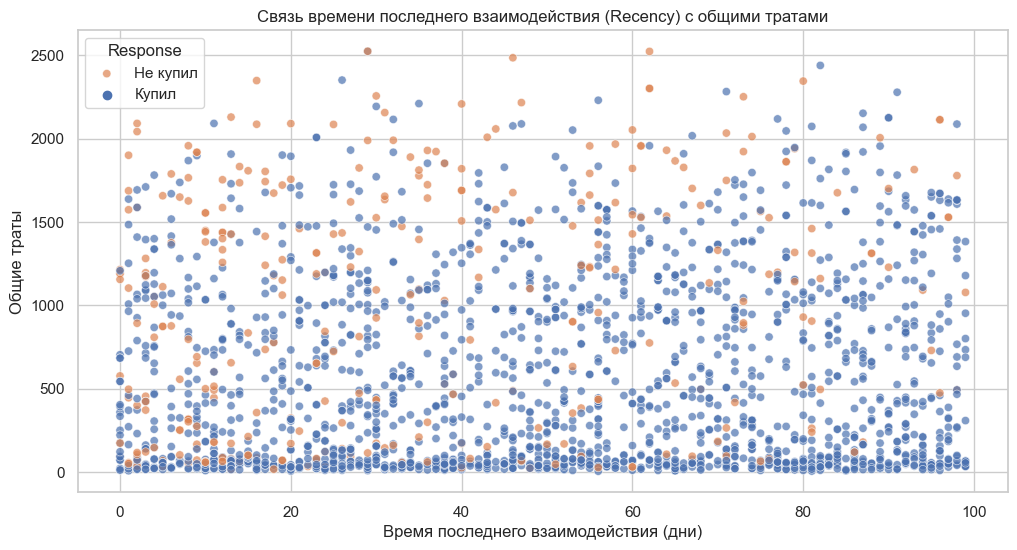

In [115]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Recency', y='Total_Spending', hue='Response', alpha=0.7, color='skyblue')
plt.title('Связь времени последнего взаимодействия (Recency) с общими тратами')
plt.xlabel('Время последнего взаимодействия (дни)')
plt.ylabel('Общие траты')
plt.legend(title='Response', labels=['Не купил', 'Купил'])
plt.show()

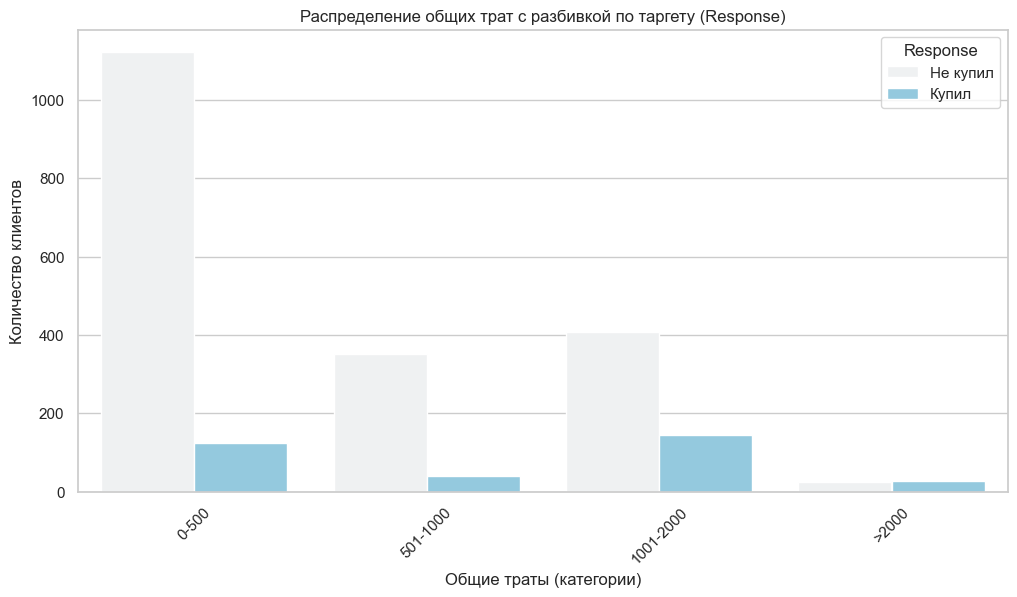

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    x='Total_Spending_Bins', 
    hue='Response', 
    order=['0-500', '501-1000', '1001-2000', '>2000'], 
    color='skyblue'
)
plt.title('Распределение общих трат с разбивкой по таргету (Response)')
plt.xlabel('Общие траты (категории)')
plt.ylabel('Количество клиентов')
plt.legend(title='Response', labels=['Не купил', 'Купил'])
plt.xticks(rotation=45)
plt.show()

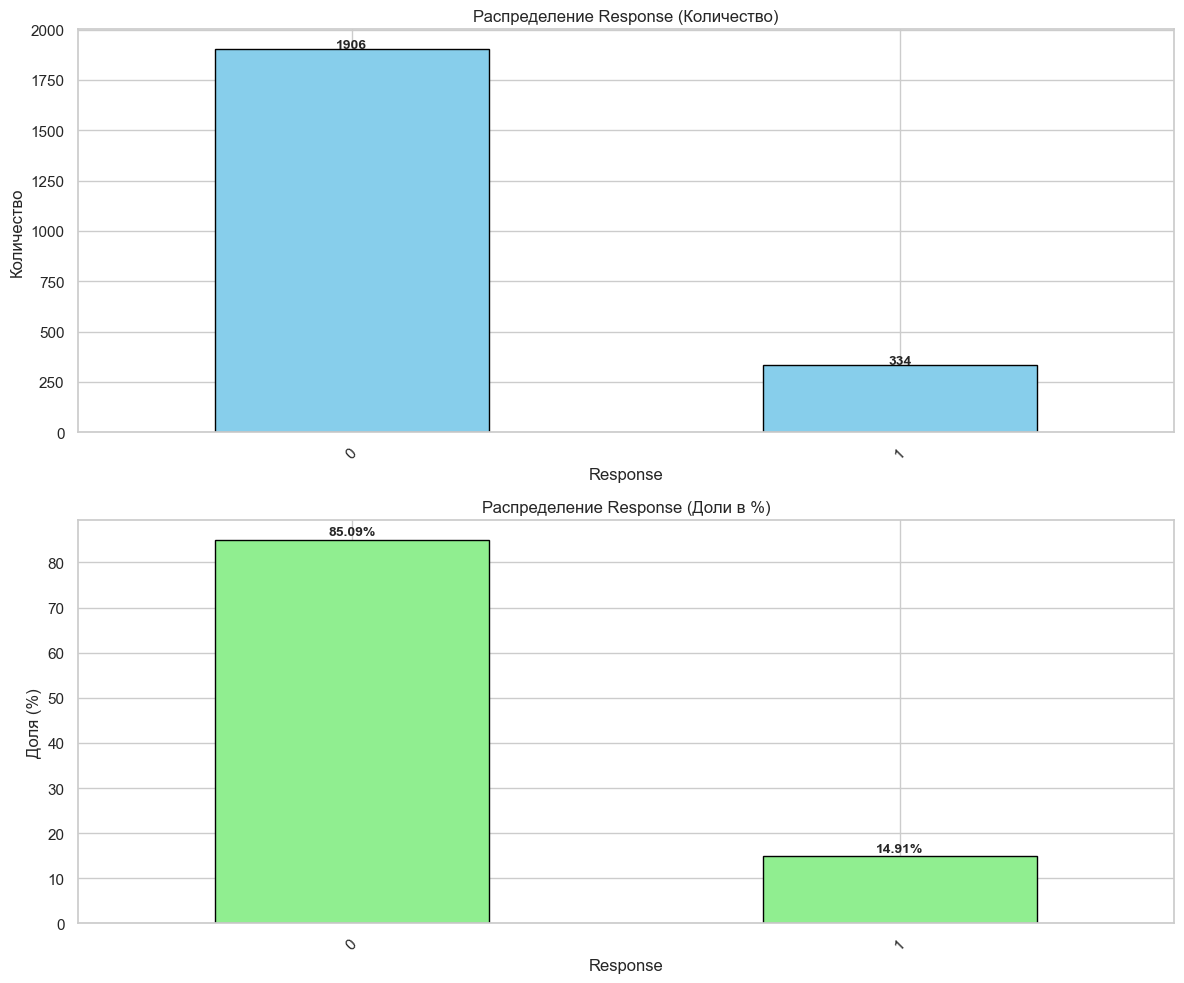

In [82]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
response_counts = df['Response'].value_counts()
bars = response_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение Response (Количество)')
plt.xlabel('Response')
plt.ylabel('Количество')
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, 
             int(bar.get_height()), ha='center', fontsize=10, fontweight='bold')
plt.subplot(2, 1, 2)
response_proportions = df['Response'].value_counts(normalize=True) * 100
bars = response_proportions.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Распределение Response (Доли в %)')
plt.xlabel('Response')
plt.ylabel('Доля (%)')
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, 
             f"{bar.get_height():.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

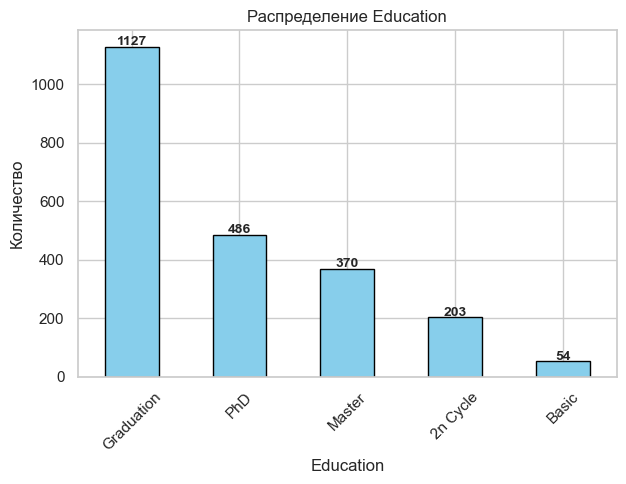

In [83]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
education_counts = df['Education'].value_counts()
bars = education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение Education')
plt.xlabel('Education')
plt.ylabel('Количество')
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, 
             int(bar.get_height()), ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

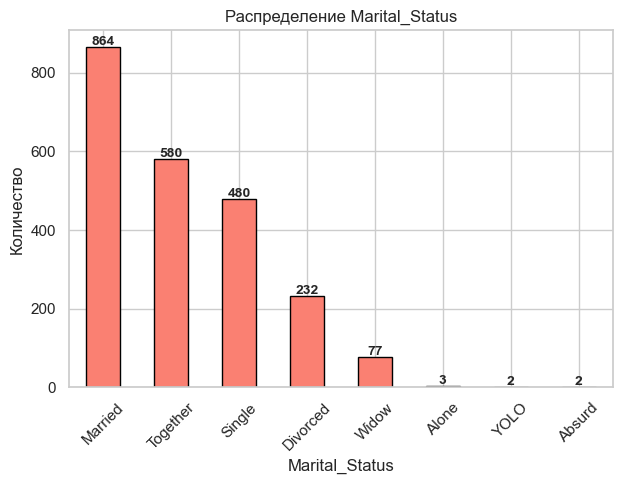

In [84]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
marital_counts = df['Marital_Status'].value_counts()
bars = marital_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Распределение Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Количество')
plt.xticks(rotation=45)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, 
             int(bar.get_height()), ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

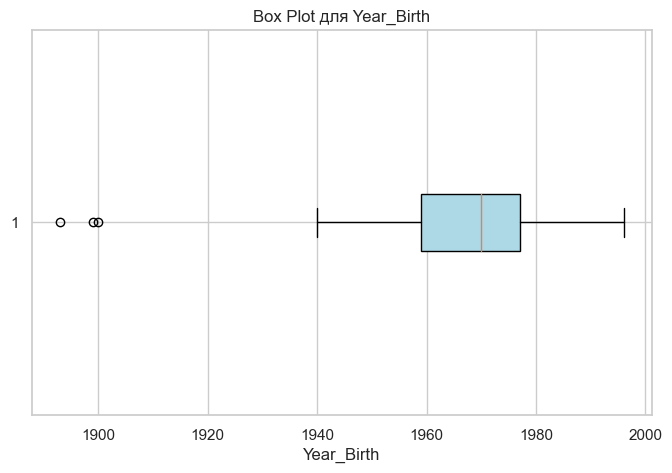

Выбросы в Year_Birth:
      Year_Birth
513         1893
827         1899
2233        1900


In [85]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['Year_Birth'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Box Plot для Year_Birth')
plt.xlabel('Year_Birth')
plt.grid(True)
plt.show()
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
outliers = df[(df['Year_Birth'] < lower_whisker) | (df['Year_Birth'] > upper_whisker)]
print("Выбросы в Year_Birth:")
print(outliers[['Year_Birth']])

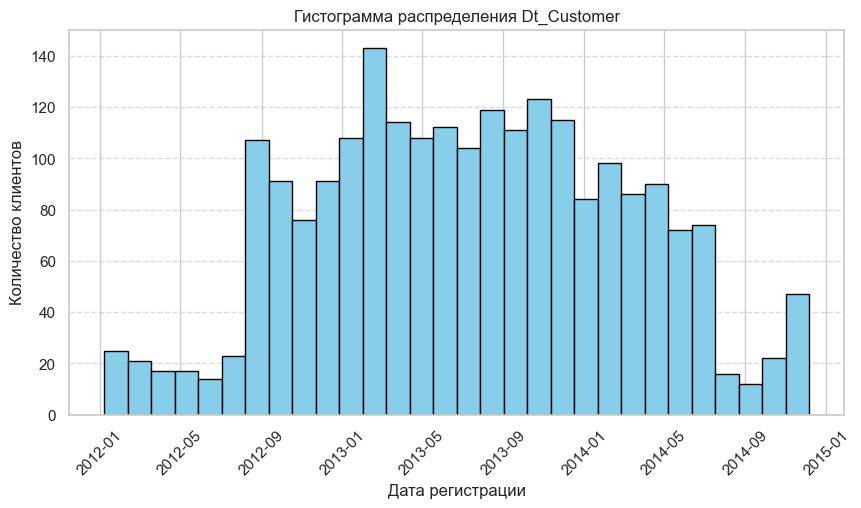

Выбросы в Dt_Customer:
Empty DataFrame
Columns: [Dt_Customer]
Index: []


In [86]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%Y')
plt.figure(figsize=(10, 5))
plt.hist(df['Dt_Customer'], bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма распределения Dt_Customer')
plt.xlabel('Дата регистрации')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
Q1 = df['Dt_Customer'].quantile(0.25)
Q3 = df['Dt_Customer'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
outliers = df[(df['Dt_Customer'] < lower_whisker) | (df['Dt_Customer'] > upper_whisker)]
print("Выбросы в Dt_Customer:")
print(outliers[['Dt_Customer']])

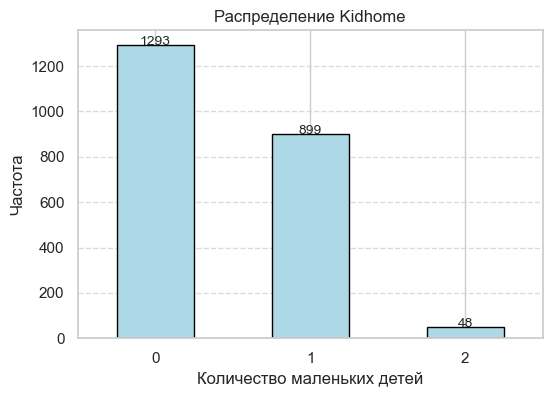

In [87]:
plt.figure(figsize=(6, 4))
df['Kidhome'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Распределение Kidhome')
plt.xlabel('Количество маленьких детей')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(df['Kidhome'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)

plt.show()

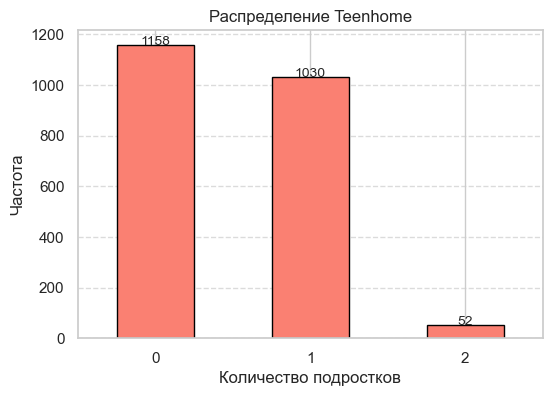

In [88]:
plt.figure(figsize=(6, 4))
df['Teenhome'].value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Распределение Teenhome')
plt.xlabel('Количество подростков')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(df['Teenhome'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)
plt.show()

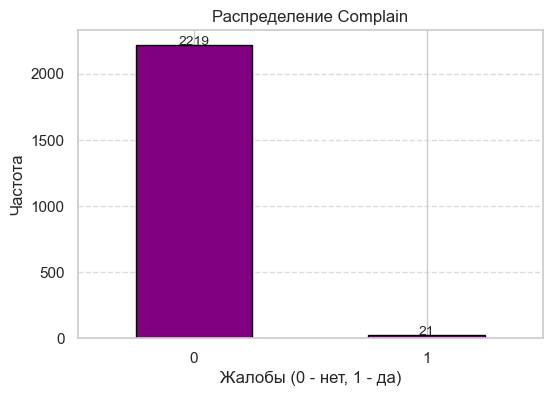

In [89]:
plt.figure(figsize=(6, 4))
df['Complain'].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Распределение Complain')
plt.xlabel('Жалобы (0 - нет, 1 - да)')
plt.ylabel('Частота')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(df['Complain'].value_counts().sort_index()):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)
plt.show()

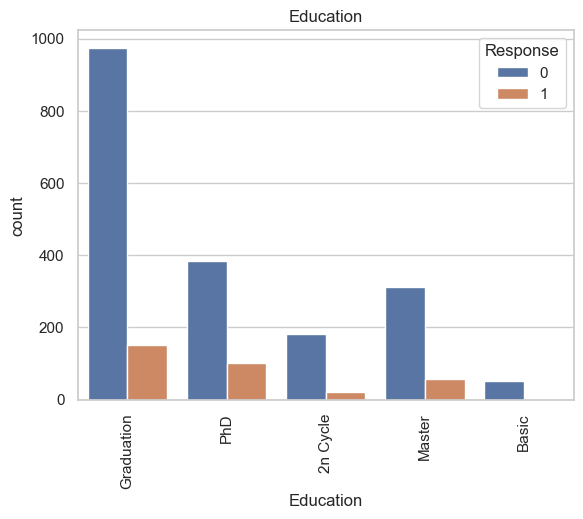

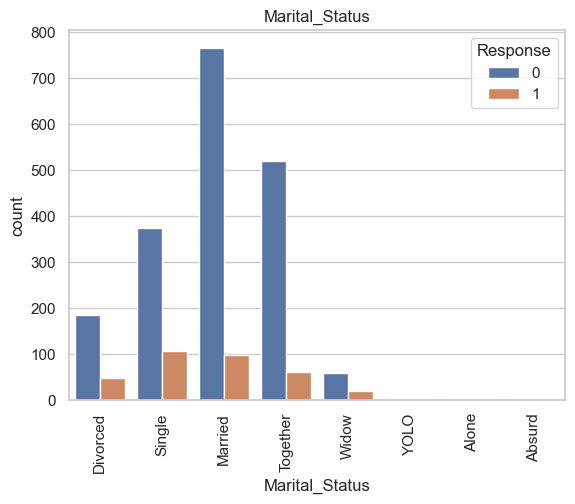

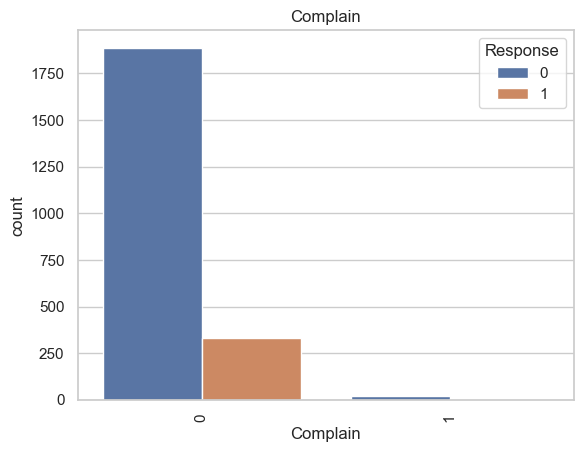

In [90]:
for i, var in enumerate(['Education', 'Marital_Status', 'Complain'], 1):
    sns.countplot(data=df, x = var, hue = 'Response')
    plt.title(var)
    plt.xticks(rotation=90)
    plt.show()

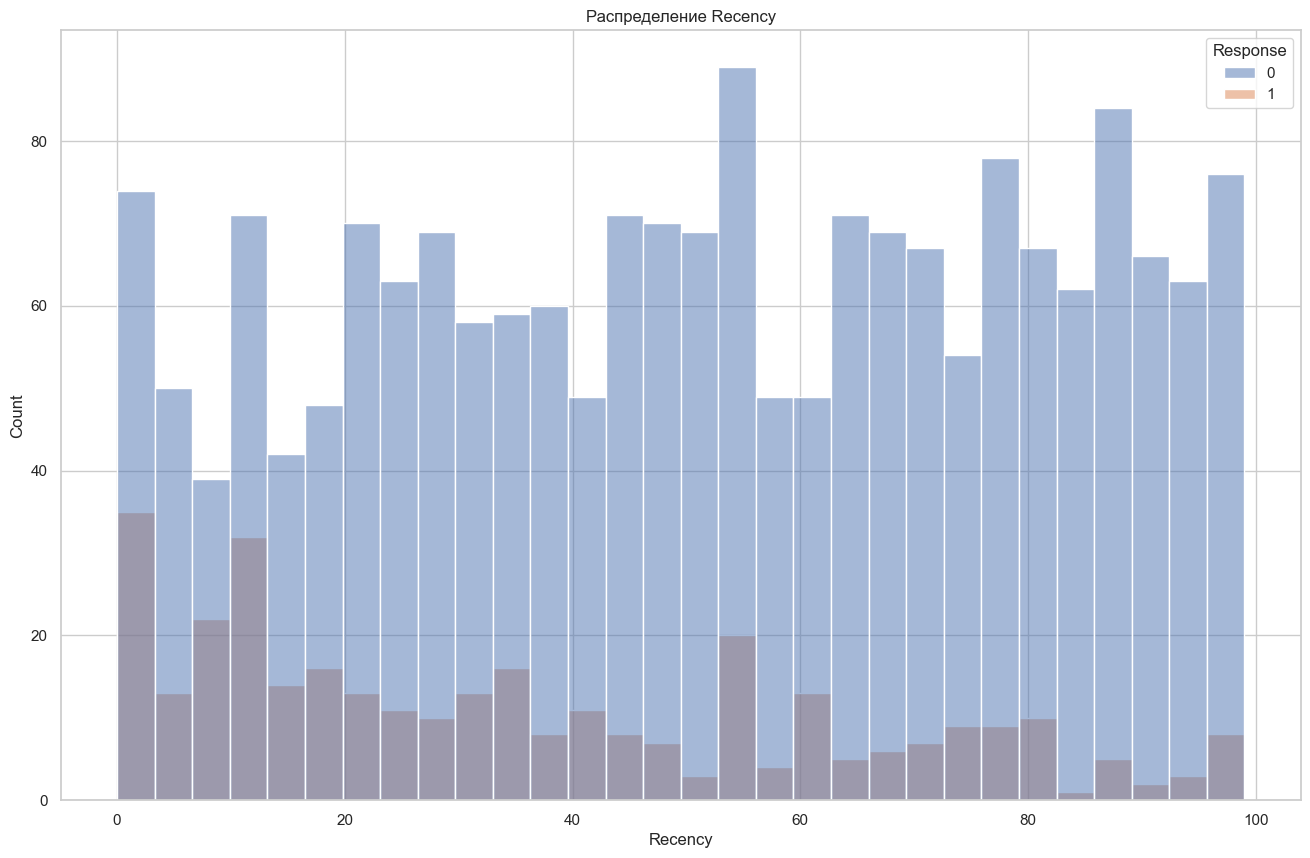

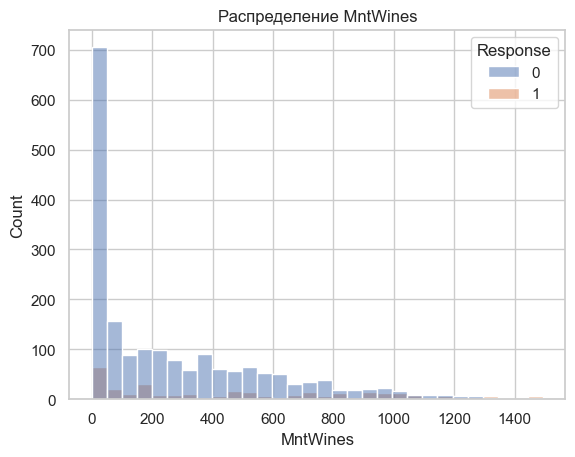

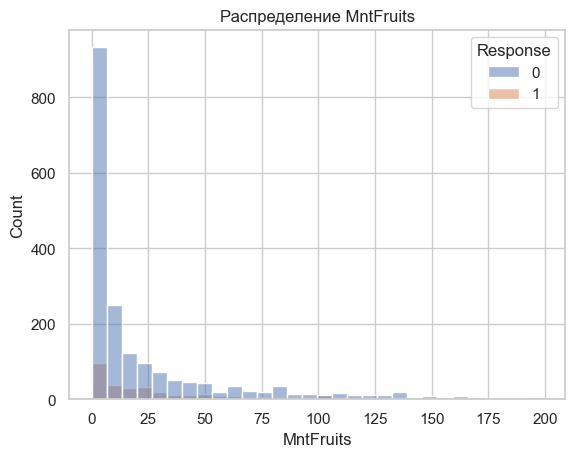

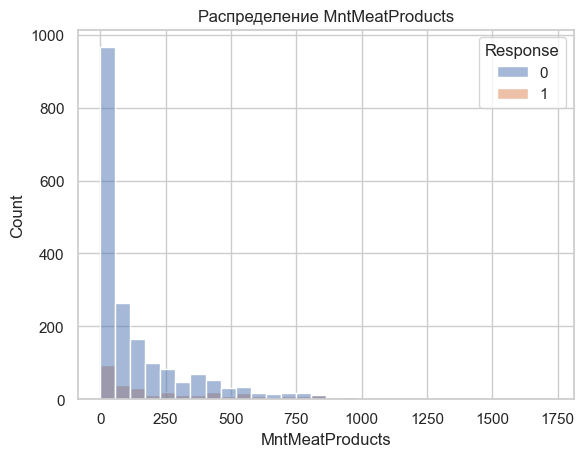

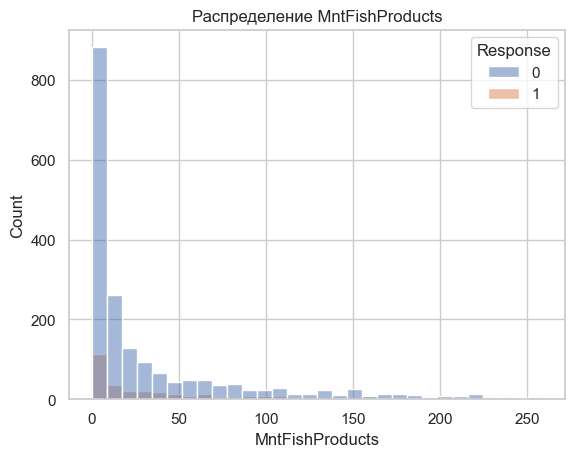

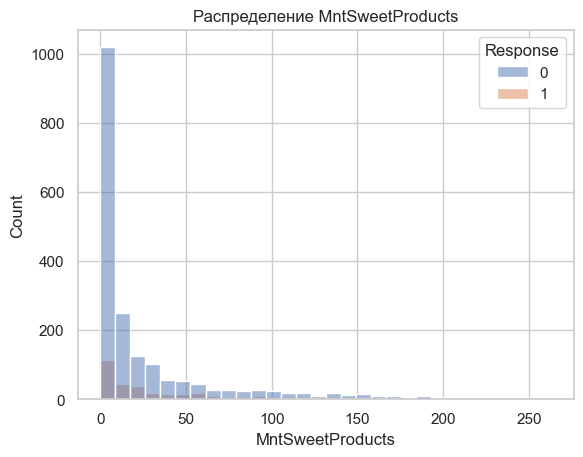

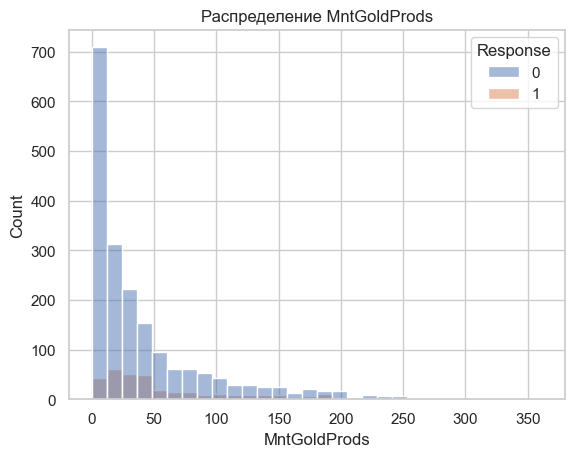

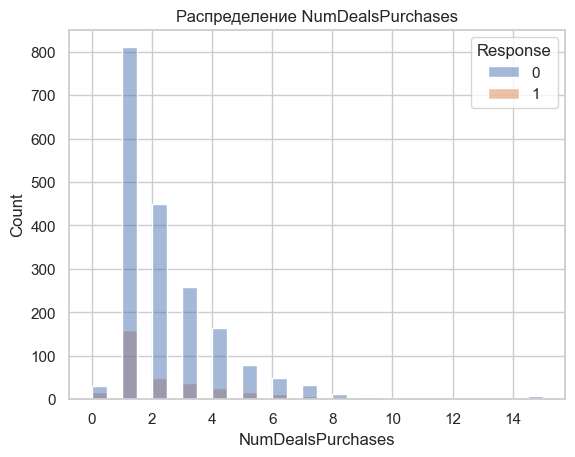

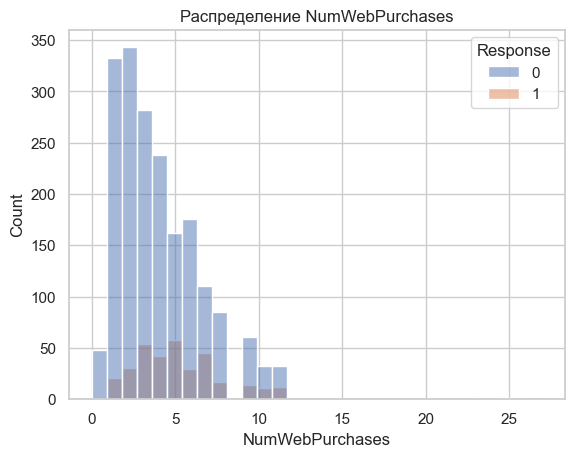

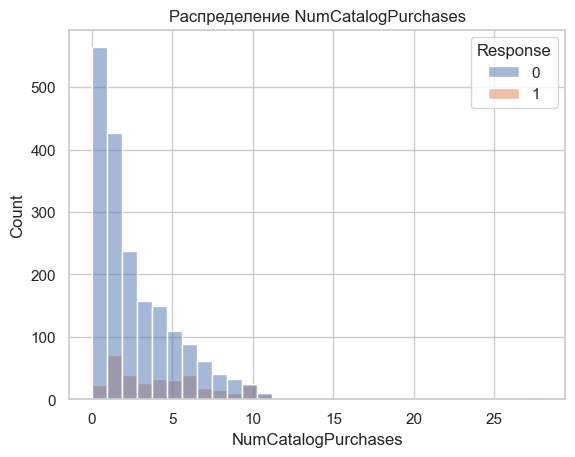

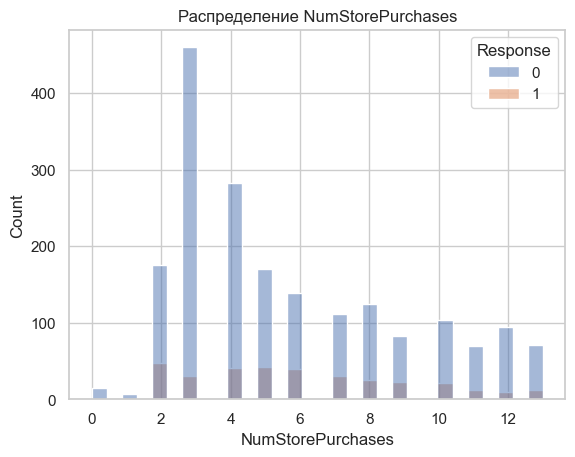

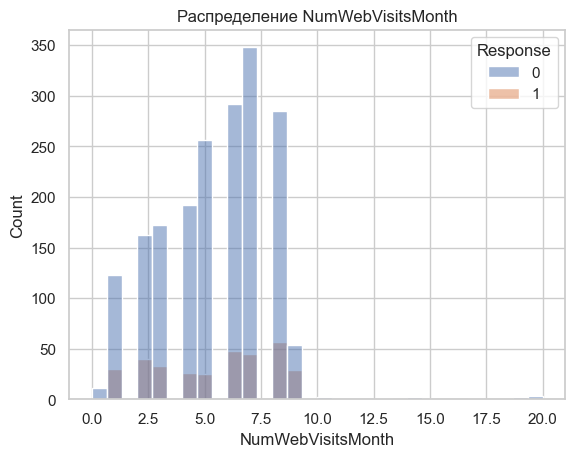

In [92]:
plt.figure(figsize=(16, 10))

for var in columns:
    sns.histplot(df, x = var, hue = 'Response', bins=30)
    plt.title(f'Распределение {var}')
    plt.show()

#### Корреляционный анализ

In [93]:
df_2 = pd.get_dummies(df, columns=["Education", "Marital_Status"])

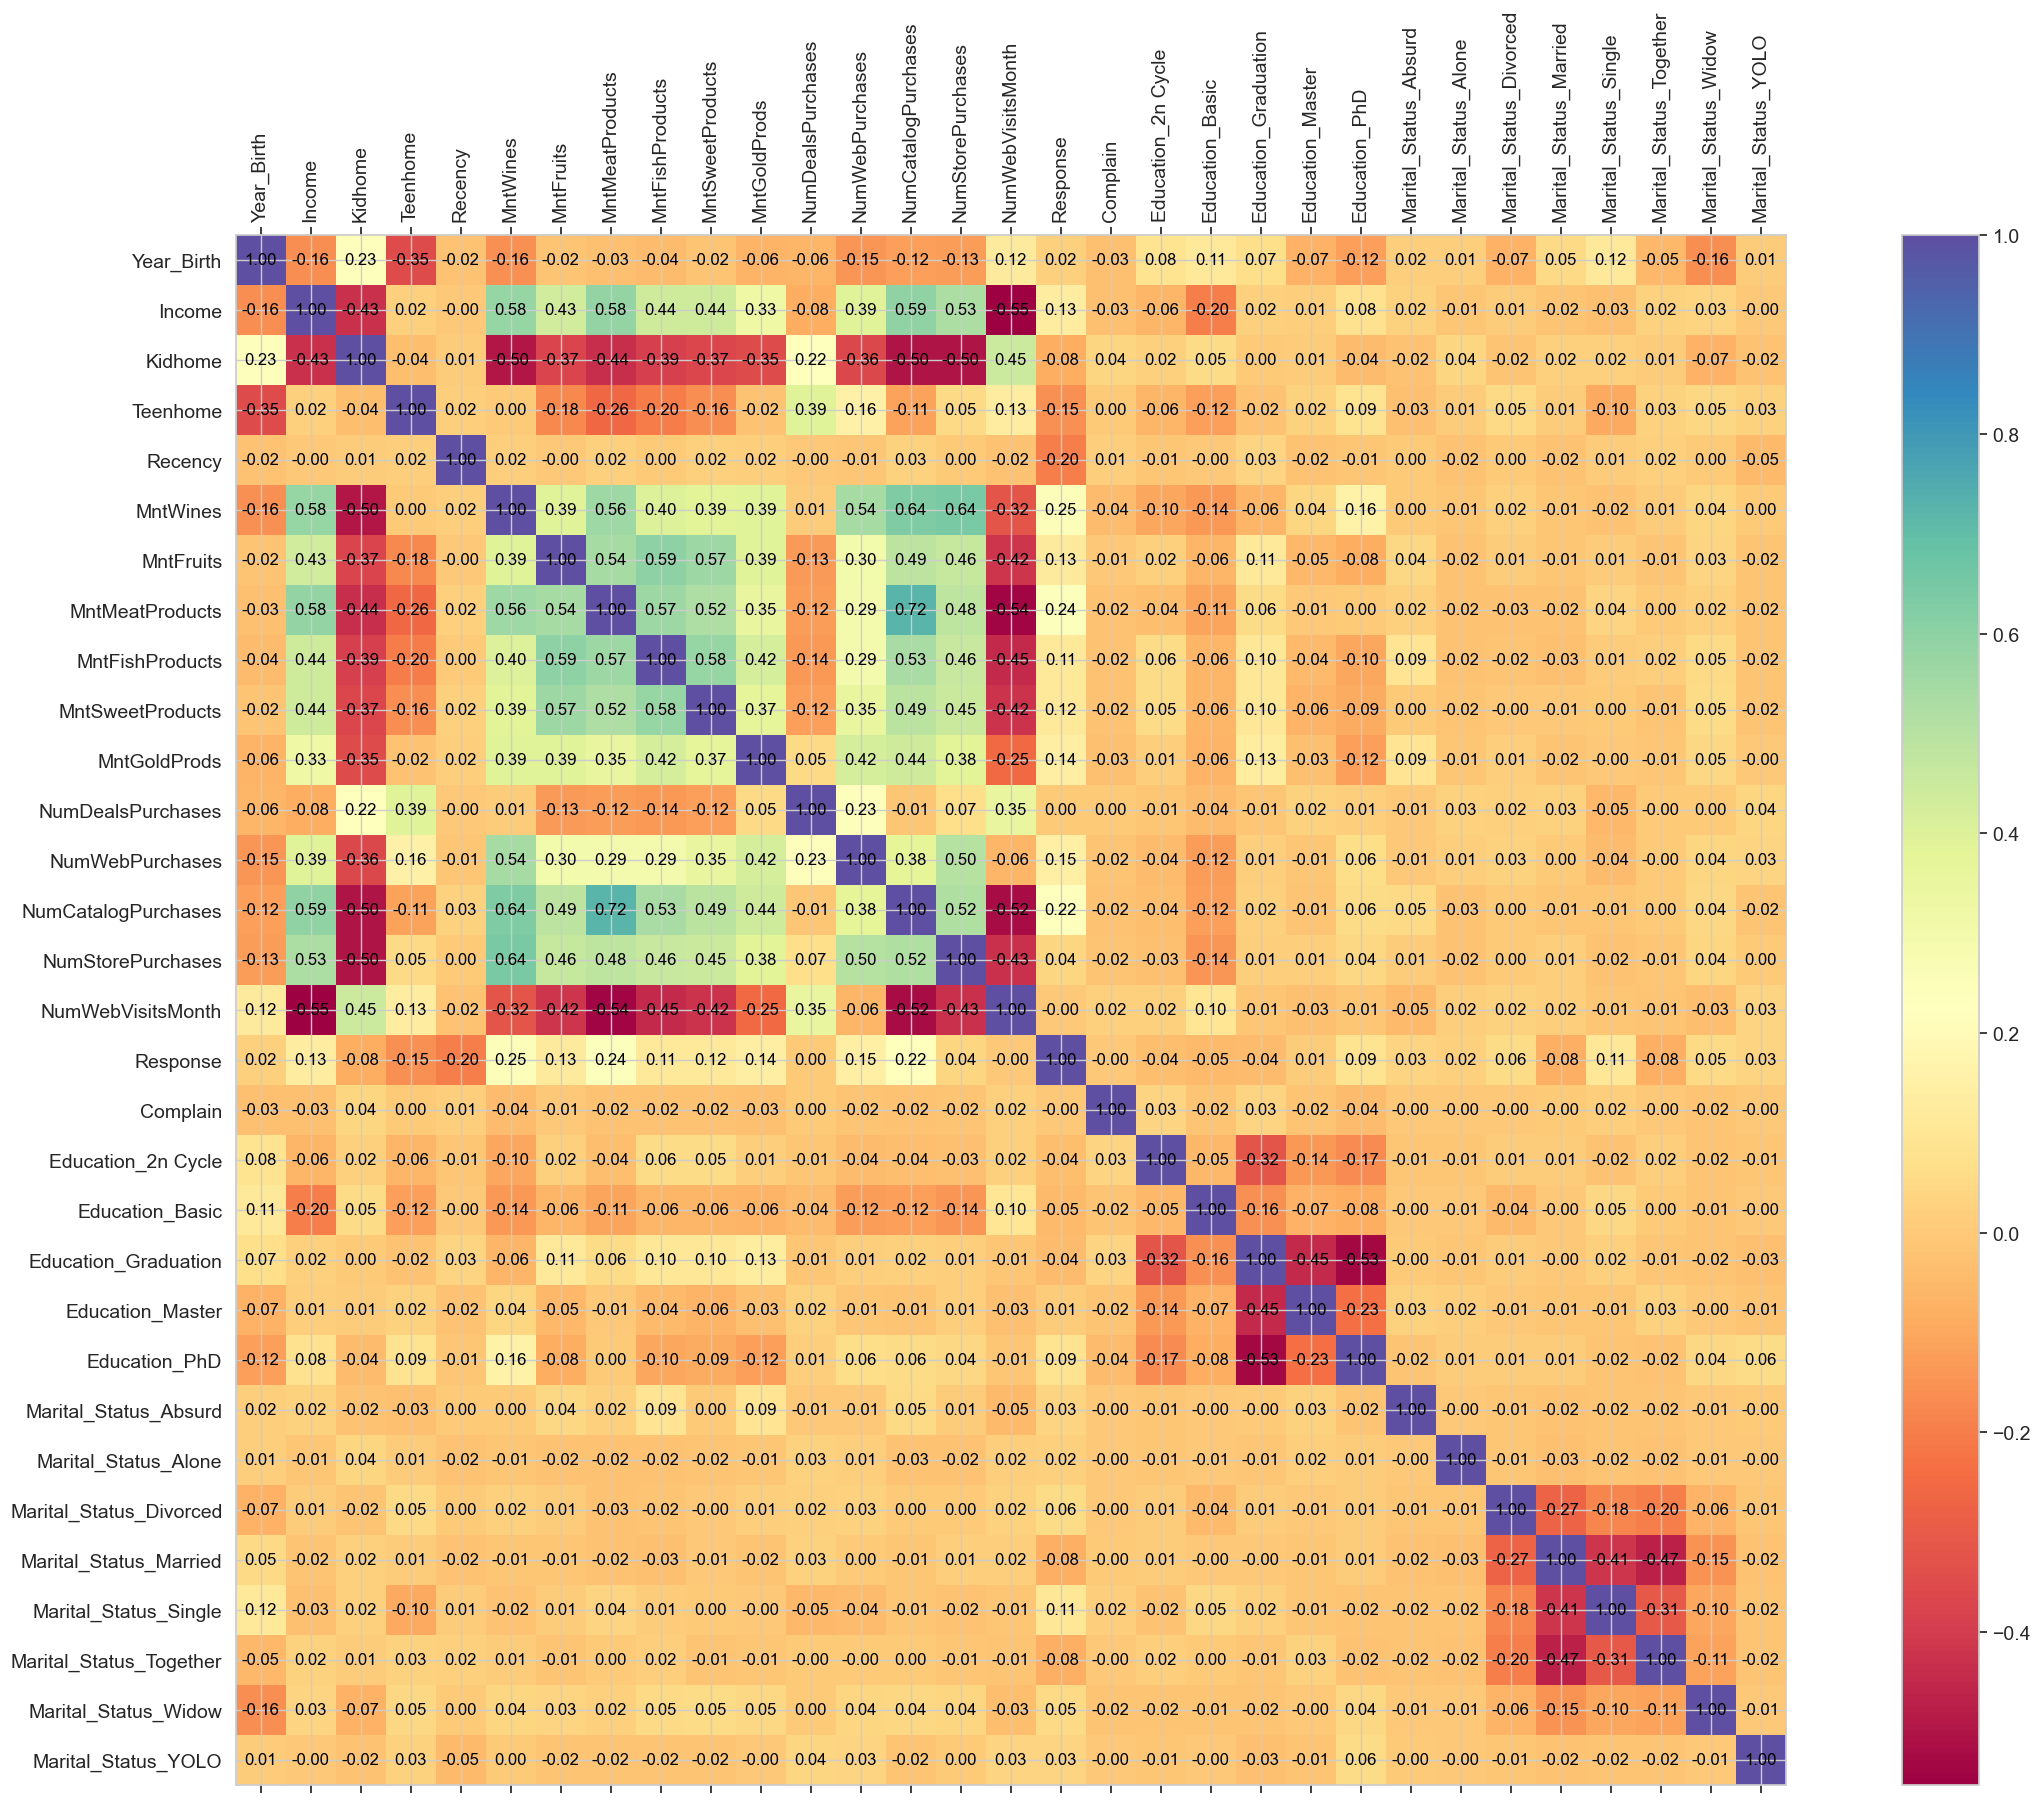

In [103]:
corr_mat = df_2.drop(['Id'], axis=1).corr()
col_names = corr_mat.columns  # Здесь уже нет 'Id'

mpl.style.use('fast')
f = plt.figure(figsize=(30, 20))
plt.matshow(corr_mat, fignum=f.number, cmap='Spectral')

tics_coords = np.arange(len(col_names))
plt.xticks(tics_coords, col_names, fontsize=14, rotation=90)
plt.yticks(tics_coords, col_names, fontsize=14)

# Правильный цикл
for i in range(corr_mat.shape[0]):  # Используем .shape[0]
    for j in range(corr_mat.shape[1]):  # Используем .shape[1]
        plt.text(j, i, f'{corr_mat.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [104]:
corr_abs = corr_mat.abs()
strong_corr = []
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):  
        if corr_abs.iloc[i, j] > 0.1: 
            strong_corr.append((col_names[i], col_names[j], corr_mat.iloc[i, j]))
strong_corr = sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True)
def correlation_strength(corr_value):
    if corr_value >= 0.7:
        return 'Очень сильная положительная'
    elif corr_value >= 0.5:
        return 'Сильная положительная'
    elif corr_value >= 0.3:
        return 'Умеренная положительная'
    elif corr_value >= 0.1:
        return 'Слабая положительная'
    elif corr_value >= -0.1:
        return 'Очень слабая связь'
    elif corr_value >= -0.3:
        return 'Слабая отрицательная'
    elif corr_value >= -0.5:
        return 'Умеренная отрицательная'
    elif corr_value >= -0.7:
        return 'Сильная отрицательная'
    else:
        return 'Очень сильная отрицательная'

for var1, var2, corr_value in strong_corr:
    correlation_type = correlation_strength(corr_value)
    print(f"{var1} и {var2}: {corr_value:.4f} ({correlation_type})")

MntMeatProducts и NumCatalogPurchases: 0.7238 (Очень сильная положительная)
MntWines и NumStorePurchases: 0.6421 (Сильная положительная)
MntWines и NumCatalogPurchases: 0.6352 (Сильная положительная)
MntFruits и MntFishProducts: 0.5948 (Сильная положительная)
Income и NumCatalogPurchases: 0.5892 (Сильная положительная)
Income и MntMeatProducts: 0.5846 (Сильная положительная)
MntFishProducts и MntSweetProducts: 0.5799 (Сильная положительная)
Income и MntWines: 0.5786 (Сильная положительная)
MntMeatProducts и MntFishProducts: 0.5684 (Сильная положительная)
MntFruits и MntSweetProducts: 0.5672 (Сильная положительная)
MntWines и MntMeatProducts: 0.5627 (Сильная положительная)
Income и NumWebVisitsMonth: -0.5531 (Сильная отрицательная)
MntFruits и MntMeatProducts: 0.5431 (Сильная положительная)
MntWines и NumWebPurchases: 0.5423 (Сильная положительная)
MntMeatProducts и NumWebVisitsMonth: -0.5395 (Сильная отрицательная)
MntFishProducts и NumCatalogPurchases: 0.5345 (Сильная положительная)
E

MntMeatProducts и NumCatalogPurchases: 0.7238 (Очень сильная положительная) – Клиенты, тратящие больше денег на мясные продукты, также чаще делают покупки по каталогу. Возможно, они склонны делать крупные заказы дистанционно.

MntWines и NumStorePurchases: 0.6421 (Сильная положительная) – Люди, которые тратят больше на вино, также чаще совершают покупки в физических магазинах. Возможно, они предпочитают выбирать алкоголь лично, а не заказывать онлайн.

MntWines и NumCatalogPurchases: 0.6352 (Сильная положительная) – Покупатели, активно приобретающие вино, также делают заказы через каталог. Это может говорить о наличии у них доверия к дистанционным покупкам.

MntFruits и MntFishProducts: 0.5948 (Сильная положительная) – Клиенты, покупающие фрукты, также тратят значительные суммы на рыбу. Это может свидетельствовать о наличии у них предпочтений в пользу здорового питания.

Income и NumCatalogPurchases: 0.5868 (Сильная положительная) – Более состоятельные клиенты чаще совершают покупки по каталогу, что может говорить о высокой загруженности или привычке к дистанционному шопингу.

MntFishProducts и MntSweetProducts: 0.5799 (Сильная положительная) – Покупатели, активно приобретающие рыбу, также покупают сладости. Это может указывать на сбалансированный рацион или наличие определённых вкусовых предпочтений.

Income и MntMeatProducts: 0.5778 (Сильная положительная) – Люди с более высоким доходом тратят больше денег на мясные продукты. Возможно, они предпочитают более дорогие и качественные виды мяса.

Income и MntWines: 0.5769 (Сильная положительная) – Состоятельные клиенты склонны тратить больше на вино. Это может свидетельствовать о престижности данного продукта среди обеспеченной аудитории.

MntMeatProducts и MntFishProducts: 0.5684 (Сильная положительная) – Покупатели, тратящие много денег на мясо, также склонны к покупкам рыбы, что может говорить об общей привычке покупать качественные продукты животного происхождения.

MntFruits и MntSweetProducts: 0.5672 (Сильная положительная) – Те, кто покупает фрукты, также тратят деньги на сладости. Это может указывать на наличие разнообразного рациона или предпочтений в сторону десертов и здоровых закусок.

MntWines и MntMeatProducts: 0.5627 (Сильная положительная) – Покупатели вина также часто тратят деньги на мясные продукты, возможно, сочетая их в своих предпочтениях.

Income и NumWebVisitsMonth: -0.5498 (Сильная отрицательная) – Более обеспеченные клиенты реже посещают сайт компании. Это может говорить о том, что они предпочитают делать покупки в других местах или доверяют каталогам и магазинам.

Корреляция переменных с Response:
MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
NumWebPurchases            0.148730
MntGoldProds               0.139850
Income                     0.133047
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
Marital_Status_Single      0.105161
Education_PhD              0.086764
Marital_Status_Divorced    0.055147
Marital_Status_Widow       0.051723
NumStorePurchases          0.039363
Marital_Status_YOLO        0.029449
Marital_Status_Absurd      0.029449
Year_Birth                 0.021325
Marital_Status_Alone       0.018941
Education_Master           0.006178
NumDealsPurchases          0.002238
Complain                  -0.001707
NumWebVisitsMonth         -0.003987
Education_2n Cycle        -0.036100
Education_Graduation      -0.040217
Education_Basic           -0.049451
Marital_Status_Together   -0.075770
Marital_Status_Married    -0.0

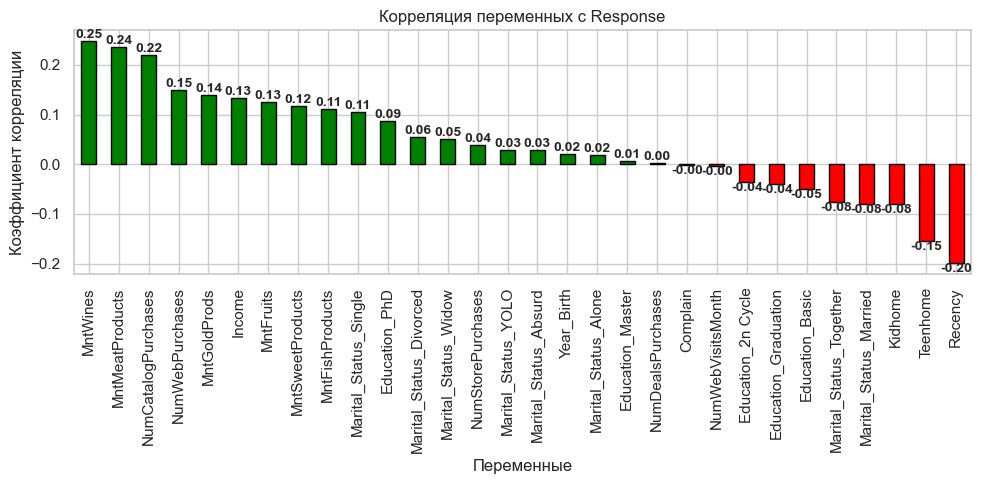

In [100]:
response_corr = df_2.drop(['Id'], axis=1).corr()['Response'].drop('Response').sort_values(ascending=False)
print("Корреляция переменных с Response:")
print(response_corr)
plt.figure(figsize=(10, 5))
bars = response_corr.plot(kind='bar', color=['red' if x < 0 else 'green' for x in response_corr], edgecolor='black')
plt.title('Корреляция переменных с Response')
plt.xlabel('Переменные')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=90)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom' if bar.get_height() > 0 else 'top',
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

MntWines (0.247254) и MntMeatProducts (0.236335) показывают наибольшую положительную корреляцию с Response. Это означает, что клиенты, которые тратят больше на вино и мясные продукты, с большей вероятностью принимают предложение компании.

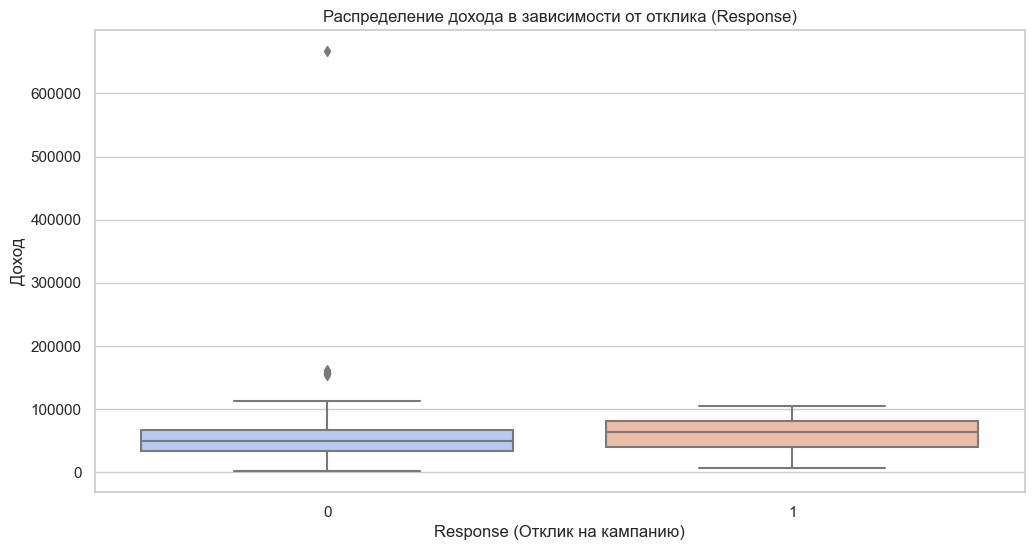

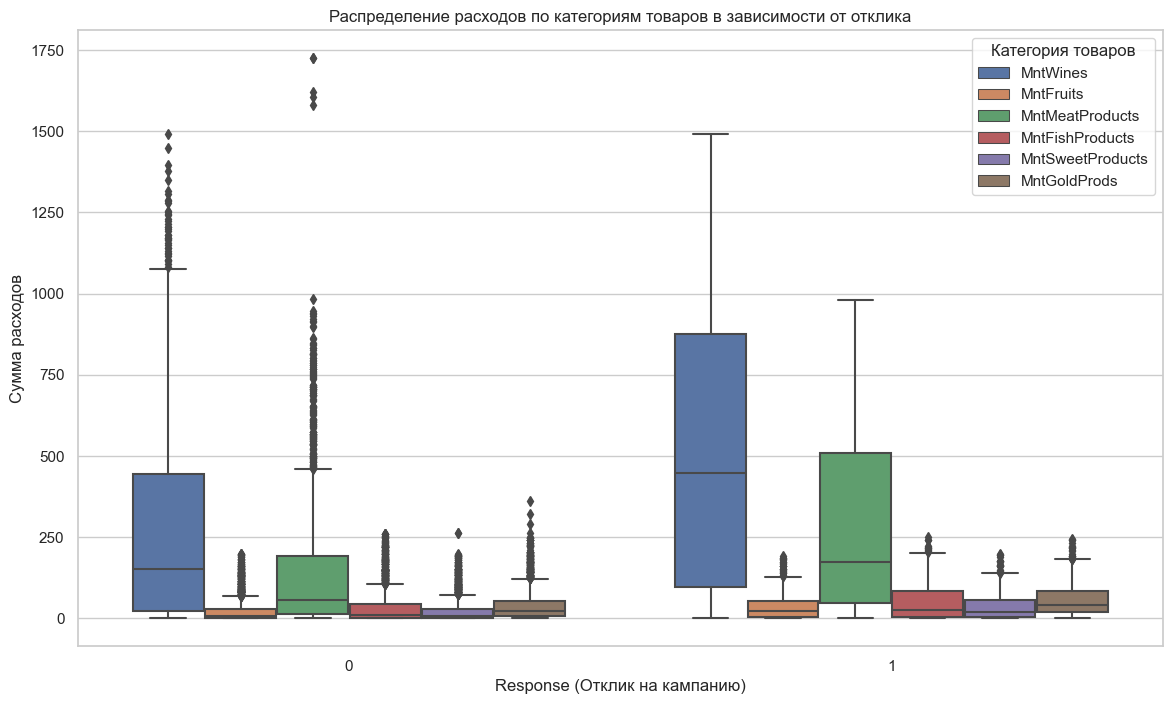

In [105]:

# Анализ распределения расходов в зависимости от Response
plt.figure(figsize=(12, 6))
sns.boxplot(x="Response", y="Income", data=df, palette="coolwarm")
plt.title("Распределение дохода в зависимости от отклика (Response)")
plt.xlabel("Response (Отклик на кампанию)")
plt.ylabel("Доход")
plt.show()

# Влияние расходов на различные категории товаров
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df_melted = df.melt(id_vars=["Response"], value_vars=spending_columns, var_name="Category", value_name="Amount")

plt.figure(figsize=(14, 8))
sns.boxplot(x="Response", y="Amount", hue="Category", data=df_melted)
plt.title("Распределение расходов по категориям товаров в зависимости от отклика")
plt.xlabel("Response (Отклик на кампанию)")
plt.ylabel("Сумма расходов")
plt.legend(title="Категория товаров")
plt.show()
